# Загрузка библиотек 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка датасетов


In [2]:
flights = pd.read_csv("flights.csv") # Данные о полётах авикомпаний США за 2015 год.
airports = pd.read_csv("airports.csv") # Данные аэропортов США.
airlines = pd.read_csv("airlines.csv") # Справочник авиакомпаний США (коды ИАТА).
L_AIRPORT = pd.read_csv("L_AIRPORT.csv") # Справочник аэропортов мира (коды ИАТА).
L_AIRPORT_ID = pd.read_csv("L_AIRPORT_ID.csv") # Справочник аэропортов мира (цифровые коды).

/var/folders/jk/3psqfr714wg6k_y_25sbs0sc0000gn/T/ipykernel_14961/2009412656.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("flights.csv") # Данные о полётах авикомпаний США за 2015 год.


# Задание 1 

- Изменяем на нижний регистр в датасете 'flights' для удобства работы с ним. 

In [3]:
flights.columns = flights.columns.str.lower()

In [4]:
flights

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Пункт 1.1


- Построим график количества рейсов по месяцам и ответим на вопрос - на какие месяцы приходится пик перелетов и когда отмечается спад.


In [5]:
number_flights_per_month = flights.day.groupby(flights.month).count()
number_flights_per_month = number_flights_per_month.reset_index()
number_flights_per_month.rename(columns={'day': 'flights'}, inplace = True)
number_flights_per_month.month.replace({1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December' }, inplace = True)
number_flights_per_month

,month,flights
0,January,469968
1,February,429191
2,March,504312
3,April,485151
4,May,496993
5,June,503897
6,July,520718
7,August,510536
8,September,464946
9,October,486165


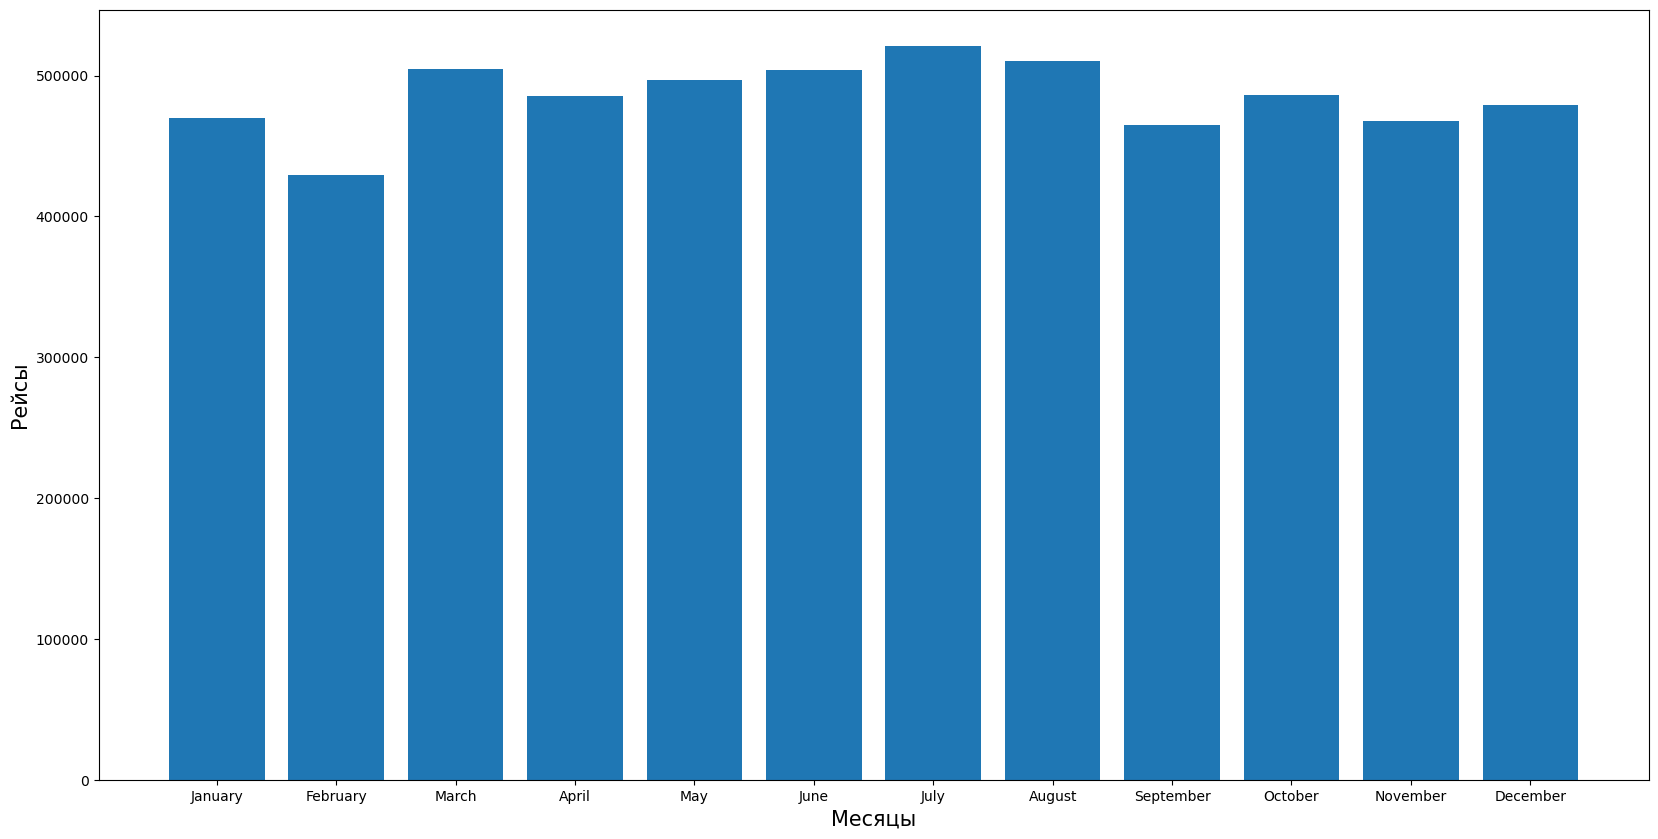

In [6]:
x = number_flights_per_month.month
y = number_flights_per_month.flights

fig, ax = plt.subplots()

ax.bar(x, y)

# plt.ylim(bottom  =200000, top = 550000 )

ax.set_xlabel('Месяцы',fontsize = 15)
ax.set_ylabel('Рейсы',fontsize = 15)

fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(10)    #  высота Figure

plt.show()

- - По графику видно, что на июль приходится пик полётов, а спад на февраль.
- - 
 

# Пункт 1.2

-  Построим график количества рейсов по дням недели и ответим на вопрос - как распределено количество рейсов по дням недели в целом.

In [7]:
flights_day_of_the_week = flights.day.groupby(flights.day_of_week).count()
flights_day_of_the_week = flights_day_of_the_week.reset_index()
flights_day_of_the_week.rename(columns={'day': 'flights'}, inplace=True)
flights_day_of_the_week.day_of_week.replace({1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday', 7 : 'Sunday'}, inplace = True)
flights_day_of_the_week

,day_of_week,flights
0,Monday,865543
1,Tuesday,844600
2,Wednesday,855897
3,Thursday,872521
4,Friday,862209
5,Saturday,700545
6,Sunday,817764


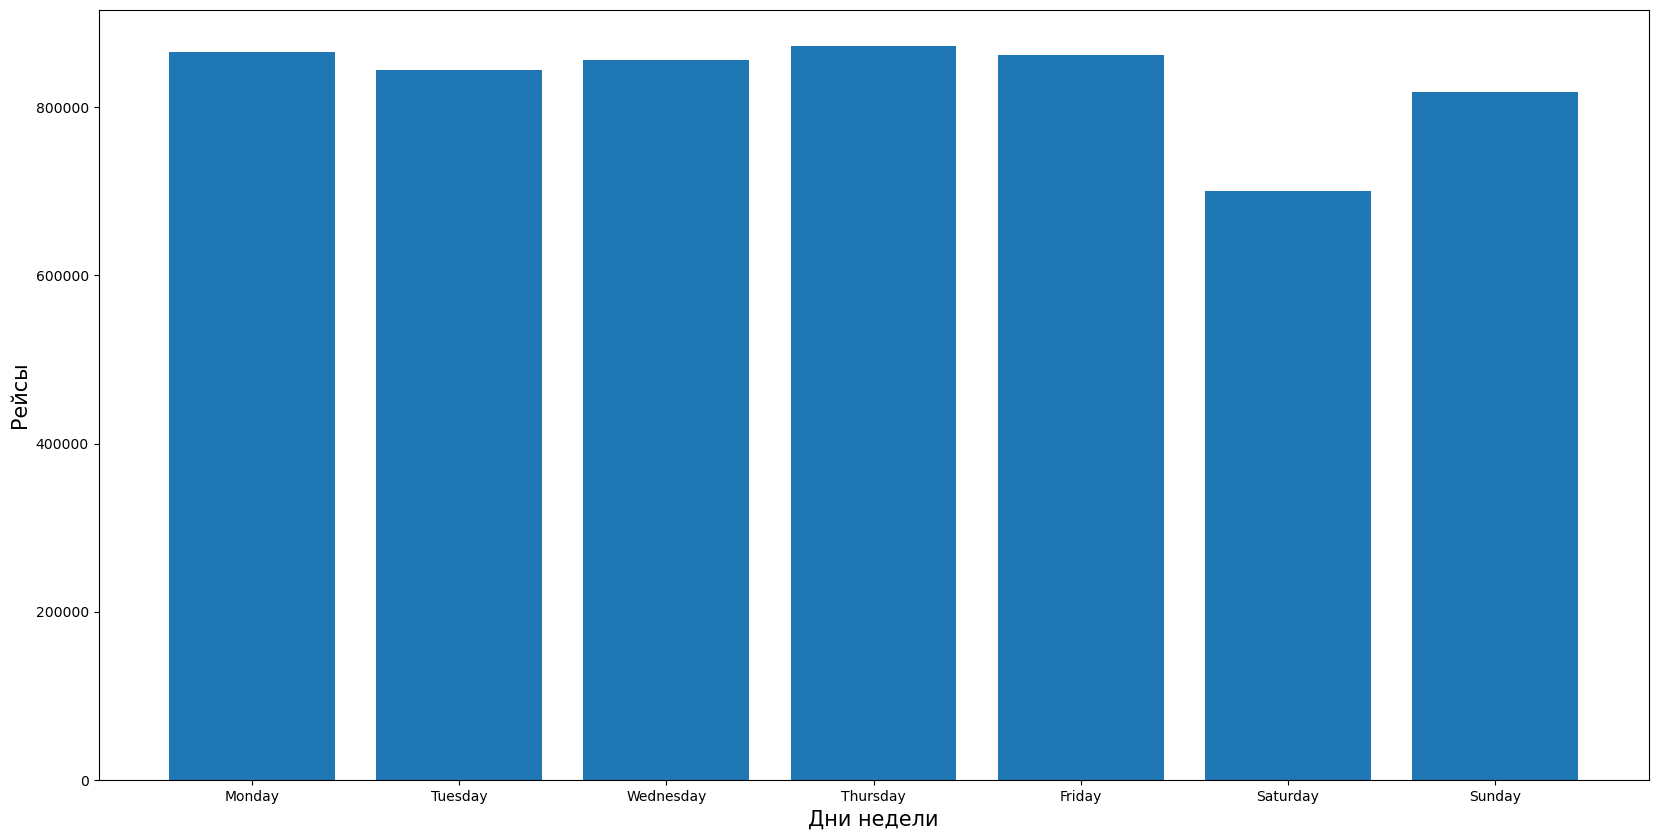

In [8]:
x = flights_day_of_the_week.day_of_week
y = flights_day_of_the_week.flights

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_xlabel('Дни недели',fontsize = 15)
ax.set_ylabel('Рейсы',fontsize = 15)

fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(10)    #  высота Figure

plt.show()

- - Видно, что график идёт равномерно, но суббота сильно выпадает.

# Пункт 1.3


- Определим топ 10 городов по количеству рейсов.


In [9]:
origin = flights.origin_airport.value_counts()
destin = flights.destination_airport.value_counts()
sum_flights = origin.append(destin)
sum_flights

/var/folders/jk/3psqfr714wg6k_y_25sbs0sc0000gn/T/ipykernel_14961/3211624880.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_flights = origin.append(destin)


ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
          ...  
13964         1
14025         1
15497         1
12265         1
10666         1
Length: 1860, dtype: int64

In [10]:
group_sum = sum_flights.groupby(sum_flights.index).sum()
airports_group = pd.DataFrame(group_sum.sort_values(ascending = False), columns = ['FLY'])
airports_group

,FLY
ATL,693740
ORD,571790
DFW,479133
DEN,392065
LAX,389369
...,...
13964,2
14222,2
12265,2
10666,1


In [11]:
group_city = airports.set_index('IATA_CODE').join(airports_group)
group_city

,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,FLY
IATA_CODE,,,,,,,
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,4550
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,4656
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,38380
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,1342
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,1752
...,...,...,...,...,...,...,...
WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982,1328
WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764,416
XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681,18567


In [12]:
top_10_city = group_city.FLY.groupby(group_city.CITY).sum().sort_values(ascending = False).head(10).reset_index()
top_10_city


,CITY,FLY
0,Chicago,733560
1,Atlanta,693740
2,Dallas-Fort Worth,479133
3,Houston,397388
4,Denver,392065
5,Los Angeles,389369
6,New York,386806
7,San Francisco,295974
8,Phoenix,293627
9,Las Vegas,266379


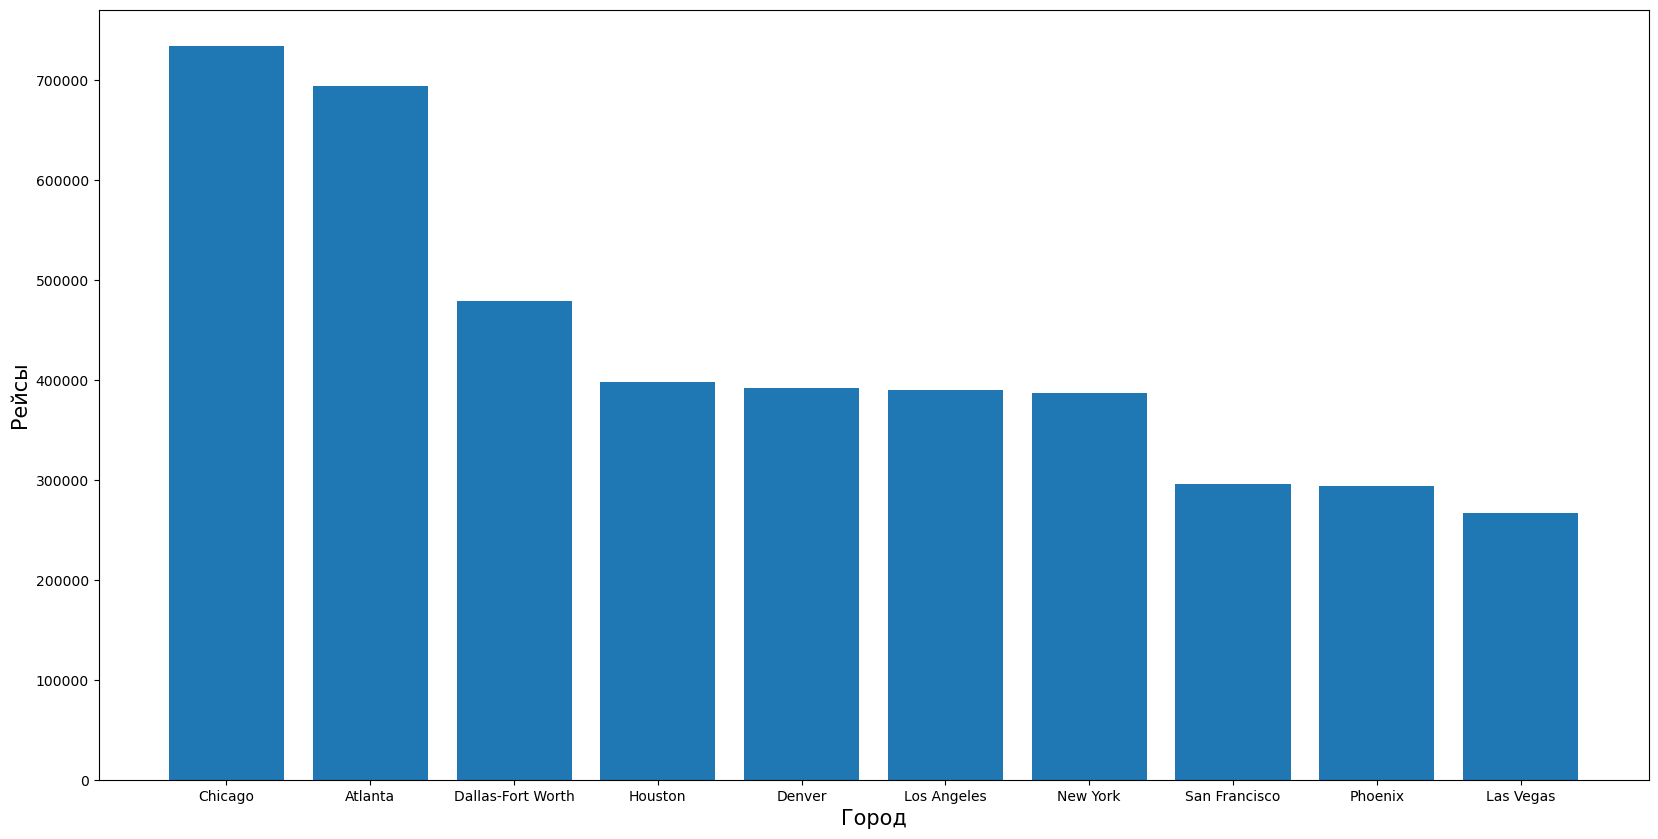

In [13]:
x = top_10_city.CITY
y = top_10_city.FLY

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_xlabel('Город',fontsize = 15)
ax.set_ylabel('Рейсы',fontsize = 15)

fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(10)    #  высота Figure

plt.show()

- - По графику видно, что Чикаго находится на 1 месте по количеству рейсов.

# 1.4


- Определим топ 10 авиакомпаний по количеству рейсов - это и будут самые популярные авиакомпании страны

In [14]:
count_flights = flights.day.groupby(flights.airline).count()
count_flights

airline
AA     725984
AS     172521
B6     267048
DL     875881
EV     571977
F9      90836
HA      76272
MQ     294632
NK     117379
OO     588353
UA     515723
US     198715
VX      61903
WN    1261855
Name: day, dtype: int64

In [15]:
top_10_airline = airlines.set_index("IATA_CODE").join(count_flights) 
top_10_airline = pd.DataFrame(top_10_airline.day.groupby(top_10_airline.AIRLINE).sum().sort_values(ascending = False).head(10).reset_index())
top_10_airline.rename(columns={'day' : 'FLIGHTS'}, inplace = True)
top_10_airline


,AIRLINE,FLIGHTS
0,Southwest Airlines Co.,1261855
1,Delta Air Lines Inc.,875881
2,American Airlines Inc.,725984
3,Skywest Airlines Inc.,588353
4,Atlantic Southeast Airlines,571977
5,United Air Lines Inc.,515723
6,American Eagle Airlines Inc.,294632
7,JetBlue Airways,267048
8,US Airways Inc.,198715
9,Alaska Airlines Inc.,172521


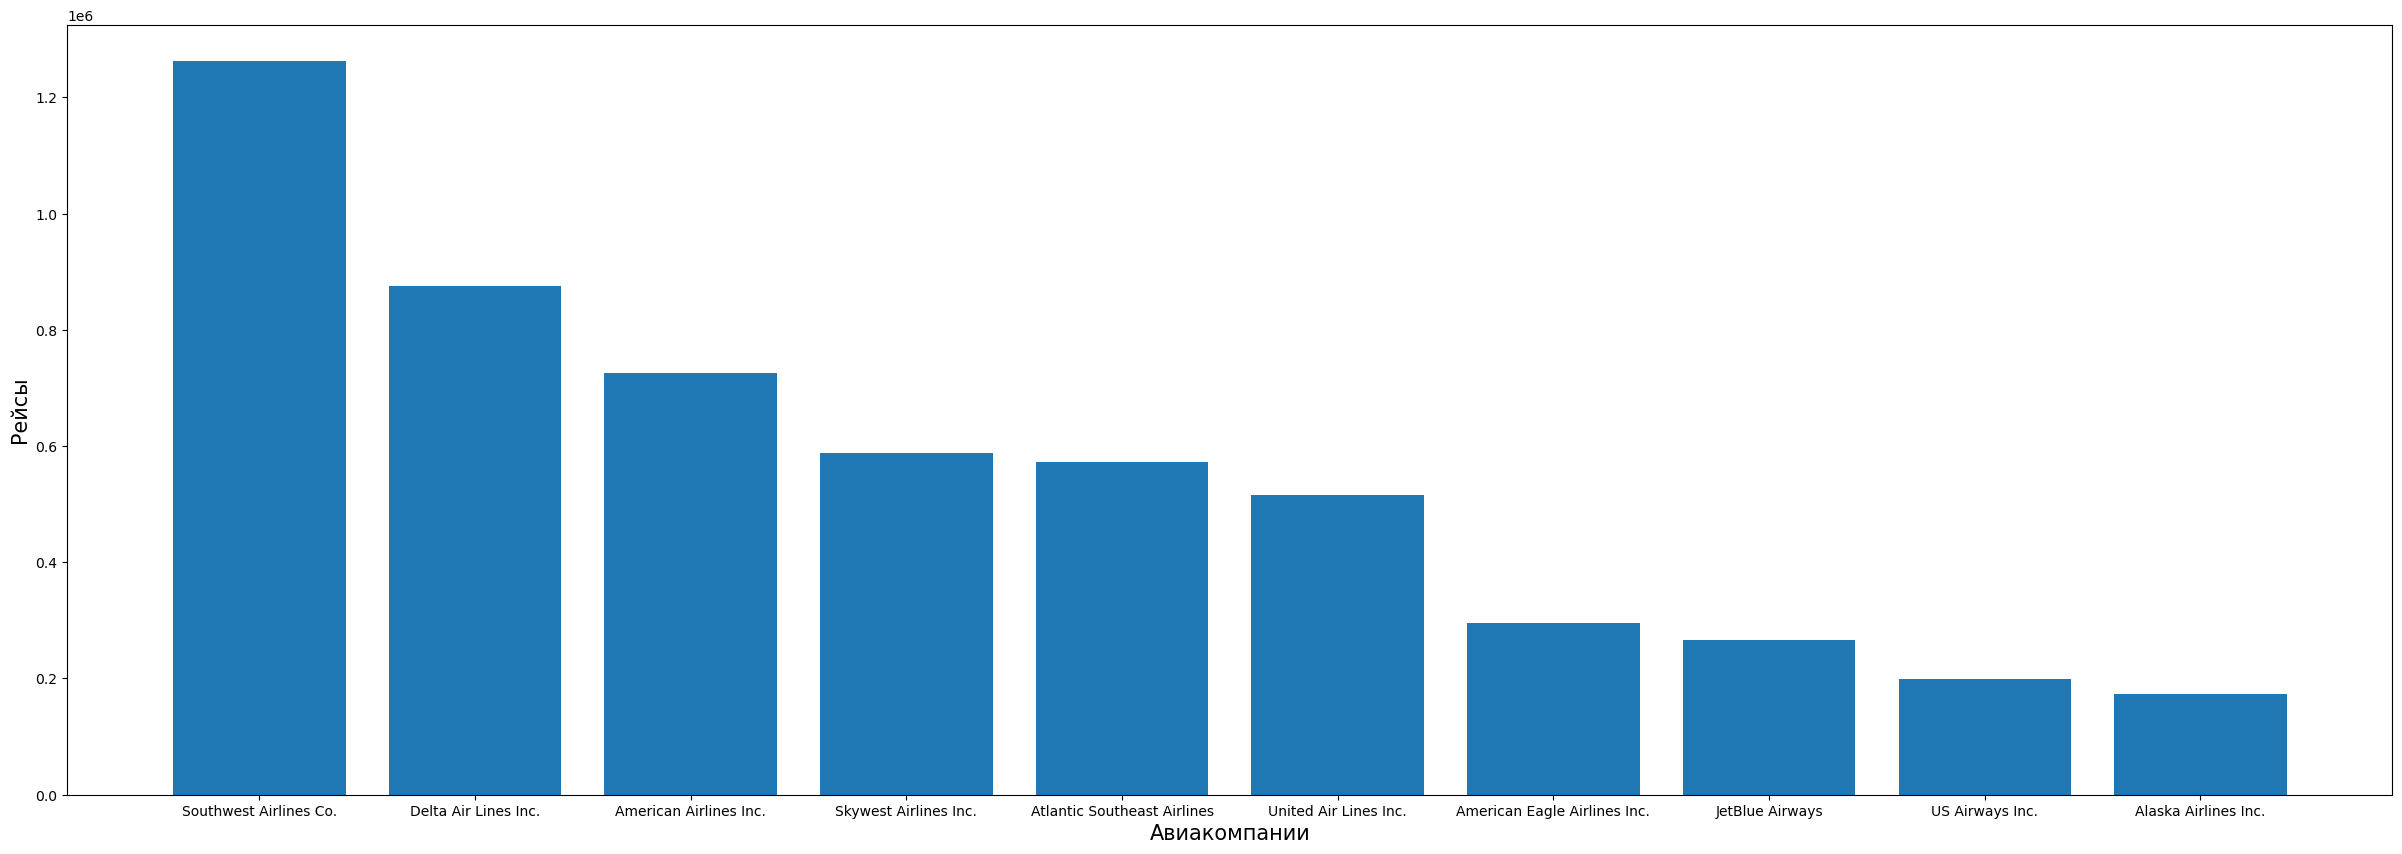

In [16]:
x = top_10_airline.AIRLINE
y = top_10_airline.FLIGHTS

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_xlabel('Авиакомпании',fontsize = 15)
ax.set_ylabel('Рейсы',fontsize = 15)

fig.set_figwidth(30)    #  ширина Figure
fig.set_figheight(10)    #  высота Figure

plt.show()

- - Самая популярная авиакомпания – это Southwest Airlines Co.

# Задание 2

 # 2.1

- Найти аэропорт с минимальной задержкой вылета

- - 1 варинат с минимальной задержкой

In [17]:
flights.departure_delay.min()

-82.0

In [18]:
minimum_departure_delay = flights.query('departure_delay == -82.0')
minimum_departure_delay

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
5645762,2015,12,20,7,AS,161,N793AS,ADK,ANC,1715,...,1940.0,-80.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
airports.query(" IATA_CODE == 'ADK' ")

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


 - - Аэропорт с минимальной задержкой вылета – это Adak Airport

In [20]:
# t = flights[flights['departure_delay'] >= 0]
# pd.DataFrame(t.departure_delay.value_counts()).index.min()
# pd.DataFrame((t[t['departure_delay'] == 0]['origin_airport']).value_counts()).reset_index().rename(columns={'index' : 'Airport', 'origin_airport' : '0_delay_races'}).iloc()[0]

In [21]:
# departure_delay_flights = pd.DataFrame(flights.departure_delay.groupby(flights.origin_airport).mean().sort_values(ascending = True)) 
# departure_delay_flights.rename(columns={'departure_delay': 'DEPARTURE_MEAN'}, inplace=True)
# departure_delay_flights = airlines.set_index('Code').join(departure_delay_flights)

# # top_10_airline_delay_mean_flights = departure_delay_flights.DEPARTURE_MEAN.groupby(departure_delay_flights.Description).mean().sort_values(ascending = True).head(10).reset_index()
# # top_10_airline_delay_mean_flights
# # departure_delay_flights

# # departure_delay_flights.nsmallest(10,'DEPARTURE_MEAN')
# departure_delay_flights

# 2.2

- Выявить самую пунктуальную авиакомпанию на прилет в аэропорт (212 + 1 = 213)

Мой аэропорт

In [45]:
airports.IATA_CODE.iloc()[213]

'MRY'

In [58]:
#airlines_delay= flights[(flights.arrival_delay == 0) & (flights.destination_airport.isin(['MRY']))]
#airlines_delay.airline.value_counts()

my_airlines_delay = flights[flights.destination_airport.isin(['MRY'])]
my_airlines_delay = pd.DataFrame(my_airlines_delay.arrival_delay.groupby(my_airlines_delay.airline).mean().sort_values(ascending = True).head(1))
my_airlines_delay.rename(columns={'arrival_delay': 'ARRIVAL_DELAY_MEAN'}, inplace=True)

airlines_delay_full = airlines.set_index('IATA_CODE').join(my_airlines_delay)
airline_arrival_delay_mean = my_airlines_delay_full.ARRIVAL_DELAY_MEAN.groupby(my_airlines_delay_full.AIRLINE).mean().sort_values(ascending = True).head(1).reset_index()
airline_arrival_delay_mean

,AIRLINE,ARRIVAL_DELAY_MEAN
0,Skywest Airlines Inc.,5.394251


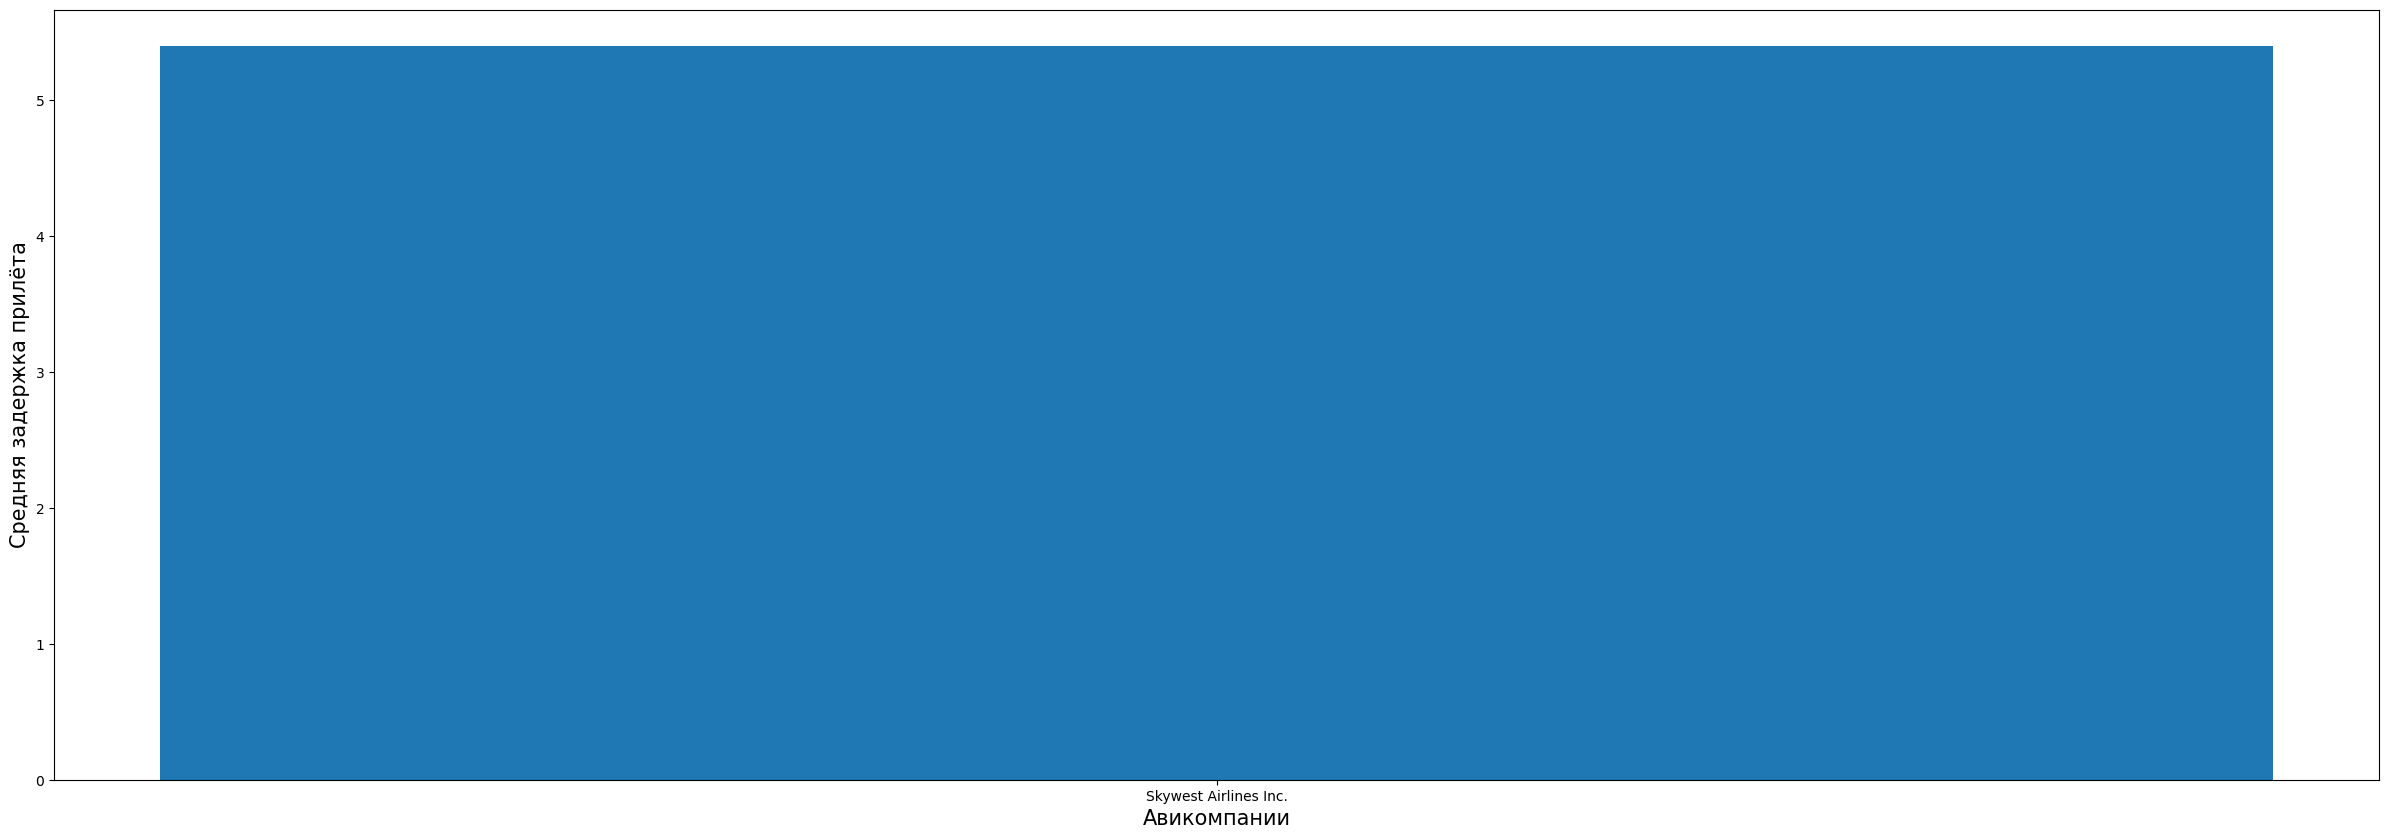

In [59]:
x = airline_arrival_delay_mean.AIRLINE
y = airline_arrival_delay_mean.ARRIVAL_DELAY_MEAN

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_xlabel('Авикомпании',fontsize = 15)
ax.set_ylabel('Средняя задержка прилёта',fontsize = 15)

fig.set_figwidth(30)    #  ширина Figure
fig.set_figheight(10)    #  высота Figure

plt.show()

- - Самая пунктуальная авиакомпания Alaska Airlines Inc.

# 2.3

In [48]:
flights.columns

Index(['year', 'month', 'day', 'day_of_week', 'airline', 'flight_number',
       'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay'],
      dtype='object')

In [49]:
airport_taxing_out = flights.taxi_out.groupby(flights.origin_airport).mean()
airport_taxing_in = flights.taxi_in.groupby(flights.destination_airport).mean()
airport_taxing = airport_taxing_out.append(airport_taxing_in)
airport_taxing = airport_taxing.groupby(airport_taxing.index).mean()

/var/folders/jk/3psqfr714wg6k_y_25sbs0sc0000gn/T/ipykernel_14961/1145725174.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airport_taxing = airport_taxing_out.append(airport_taxing_in)


In [50]:
airports_taxing_group = pd.DataFrame(airport_taxing.sort_values(ascending = False), columns = ['mean_taxi'])
airports_taxing_group

,mean_taxi
10747,28.369048
12953,22.155465
JFK,17.876018
LGA,17.810657
12953,17.176806
...,...
CNY,4.626829
15841,4.250000
10666,4.000000
11905,3.500000


In [28]:
mean_taxi_air = airports.query("IATA_CODE == 'JFK'")
mean_taxi_air


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
166,JFK,John F. Kennedy International Airport (New Yor...,New York,NY,USA,40.63975,-73.77893
